# PyCity Schools Analysis

- The analysis delved into the academic performance of schools, scrutinizing data from both Charter and District schools. By merging datasets on school and student information, crucial metrics like average math and reading scores, as well as percentages for passing math, reading, and overall passing rates, were meticulously computed. Grouping the data by school type unveiled noteworthy disparities: Charter schools consistently boasted higher average scores and overall passing rates compared to their District counterparts. Visual representations further emphasized these discrepancies, with bar plots vividly illustrating the superior academic performance of Charter schools. These findings underscore the importance of school type in shaping student achievement outcomes, offering valuable insights for educational policymakers and stakeholders aiming to optimize academic success.
---

In [21]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path

# File to Load (Remember to Change These)
school_data = Path("Resources/schools_complete.csv")
student_data = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data)
student_data = pd.read_csv(student_data)

# Combine the data into a single dataset.
data_df = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
data_df.head()


,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

In [22]:
# Calculate the total number of unique schools
school_count = school_data['school_name'].nunique()
school_count


15

In [23]:
# Calculate the total number of students
student_count = student_data['Student ID'].nunique()
student_count


39170

In [28]:
# Calculate the total budget
budget = data_df['budget'].unique()
total_budget = sum(budget)
total_budget

24649428

In [29]:
# Calculate the average (mean) math score
average_math_score = data_df['math_score'].mean()
average_math_score


78.98537145774827

In [30]:
# Calculate the average (mean) reading score
average_reading_score = data_df['reading_score'].mean()
average_reading_score


81.87784018381414

In [37]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = school_data_complete[(school_data_complete["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100
passing_math_percentage


74.9808526933878

In [38]:
# Calculate the percentage of students who passed reading (hint: look at how the math percentage was calculated)
passing_reading_count = school_data_complete[(school_data_complete["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count / float(student_count) * 100
passing_reading_percentage


85.80546336482001

In [39]:
# Use the following to calculate the percentage of students that passed math and reading
passing_math_reading_count = school_data_complete[
    (school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)
].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100
overall_passing_rate


65.17232575950983

In [40]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary = pd.DataFrame({"Total Schools": [school_count],
                                    "Total Students": [student_count],
                                    "Total Budget": [total_budget],
                                    "Average Math Score": [average_math_score],
                                    "Average Reading Score": [average_reading_score],
                                    "% Passing Math": [passing_math_percentage],
                                    "% Passing Reading": [passing_reading_percentage],
                                    "% Overall Passing": [overall_passing_rate]})

# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

In [42]:
# Use the code provided to select the school type
school_types = school_data.set_index(["school_name"])["type"]

In [50]:
# Calculate the total student count per school from school_data
per_school_counts = school_data_complete.groupby(["school_name"]).count()["Student ID"]

In [51]:
print(school_data_complete.head())  # Check the first few rows of the DataFrame
print(school_data_complete.columns)  # Check the column names in the DataFrame

   Student ID       student_name gender grade        school_name  \
0           0       Paul Bradley      M   9th  Huang High School   
1           1       Victor Smith      M  12th  Huang High School   
2           2    Kevin Rodriguez      M  12th  Huang High School   
3           3  Dr. Richard Scott      M  12th  Huang High School   
4           4         Bonnie Ray      F   9th  Huang High School   

   reading_score  math_score  School ID      type  size   budget  
0             66          79          0  District  2917  1910635  
1             94          61          0  District  2917  1910635  
2             90          60          0  District  2917  1910635  
3             67          58          0  District  2917  1910635  
4             97          84          0  District  2917  1910635  
Index(['Student ID', 'student_name', 'gender', 'grade', 'school_name',
       'reading_score', 'math_score', 'School ID', 'type', 'size', 'budget'],
      dtype='object')


In [53]:
# Check unique values in the "budget" column
unique_budget_values = school_data_complete['budget'].unique()
print(unique_budget_values)

[1910635 1884411 1056600 3022020  917500 1319574 1081356 3124928  248087
  585858 1049400 2547363 3094650 1763916 1043130]


In [58]:
import pandas as pd
from pathlib import Path

# File paths
school_data_file = Path("Resources/schools_complete.csv")
student_data_file = Path("Resources/students_complete.csv")

# Read data into DataFrames
school_data = pd.read_csv(school_data_file)
student_data = pd.read_csv(student_data_file)

# Merge data into a single DataFrame
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name"])

# Convert "budget" column to numeric data type
school_data_complete['budget'] = pd.to_numeric(school_data_complete['budget'], errors='coerce')

# Create a dictionary mapping each school to its budget
school_budget_dict = dict(zip(school_data_complete['school_name'], school_data_complete['budget']))

# Calculate the mean budget per school
per_school_budget = school_data_complete['school_name'].map(school_budget_dict).groupby(school_data_complete['school_name']).mean()

# Display the results
print("Total School Budget:")
print(per_school_budget)

Total School Budget:
school_name
Bailey High School       3124928.0
Cabrera High School      1081356.0
Figueroa High School     1884411.0
Ford High School         1763916.0
Griffin High School       917500.0
Hernandez High School    3022020.0
Holden High School        248087.0
Huang High School        1910635.0
Johnson High School      3094650.0
Pena High School          585858.0
Rodriguez High School    2547363.0
Shelton High School      1056600.0
Thomas High School       1043130.0
Wilson High School       1319574.0
Wright High School       1049400.0
Name: school_name, dtype: float64


In [59]:
# Calculate the total school budget and per capita spending per school from school_data
# Step 1: Calculate the total budget for each school
total_budget_per_school = school_data.groupby('school_name')['budget'].sum()

# Step 2: Calculate the per capita spending
# First, get the number of students in each school
num_students_per_school = school_data.groupby('school_name')['size'].sum()

# Then, calculate the per capita spending
per_capita_spending_per_school = total_budget_per_school / num_students_per_school

In [61]:
# Calculate the average test scores per school from school_data_complete
# Step 1: Group the DataFrame by the school name
grouped_by_school = school_data_complete.groupby('school_name')

# Step 2: Calculate the average test scores per school
average_scores_per_school = grouped_by_school[['reading_score', 'math_score']].mean()

In [62]:
# Calculate the number of students per school with math scores of 70 or higher from school_data_complete
# Step 1: Filter the DataFrame for math scores of 70 or higher
filtered_data = school_data_complete[school_data_complete['math_score'] >= 70]

# Step 2: Group the filtered DataFrame by the school name
grouped_by_school = filtered_data.groupby('school_name')

# Step 3: Count the number of students per school
students_per_school_above_70_math = grouped_by_school.size()

In [63]:
# Calculate the number of students per school with reading scores of 70 or higher from school_data_complete
# Step 1: Filter the DataFrame for reading scores of 70 or higher
filtered_data_reading = school_data_complete[school_data_complete['reading_score'] >= 70]

# Step 2: Group the filtered DataFrame by the school name
grouped_by_school_reading = filtered_data_reading.groupby('school_name')

# Step 3: Count the number of students per school
students_per_school_above_70_reading = grouped_by_school_reading.size()

In [17]:
# Use the provided code to calculate the number of students per school that passed both math and reading with scores of 70 or higher
students_passing_math_and_reading = school_data_complete[
    (school_data_complete["reading_score"] >= 70) & (school_data_complete["math_score"] >= 70)
]
school_students_passing_math_and_reading = students_passing_math_and_reading.groupby(["school_name"]).size()


In [18]:
# Use the provided code to calculate the passing rates
per_school_passing_math = school_students_passing_math / per_school_counts * 100
per_school_passing_reading = school_students_passing_reading / per_school_counts * 100
overall_passing_rate = school_students_passing_math_and_reading / per_school_counts * 100


In [64]:
# Calculate total school budget
total_school_budget = school_data_complete.groupby('school_name')['budget'].first()

# Calculate per capita spending per school
per_capita_spending = total_school_budget / school_data_complete.groupby('school_name')['Student ID'].count()

# Calculate average test scores per school
average_math_score = school_data_complete.groupby('school_name')['math_score'].mean()
average_reading_score = school_data_complete.groupby('school_name')['reading_score'].mean()

# Calculate the number of students per school with math scores of 70 or higher
passing_math_per_school = school_data_complete[school_data_complete['math_score'] >= 70].groupby('school_name').size()

# Calculate the number of students per school with reading scores of 70 or higher
passing_reading_per_school = school_data_complete[school_data_complete['reading_score'] >= 70].groupby('school_name').size()

# Create the per_school_summary DataFrame
per_school_summary = pd.DataFrame({
    "Total School Budget": total_school_budget,
    "Per Student Budget": per_capita_spending,
    "Average Math Score": average_math_score,
    "Average Reading Score": average_reading_score,
    "% Passing Math": (passing_math_per_school / school_data_complete.groupby('school_name')['Student ID'].count()) * 100,
    "% Passing Reading": (passing_reading_per_school / school_data_complete.groupby('school_name')['Student ID'].count()) * 100,
    "% Overall Passing Rate": ((passing_math_per_school + passing_reading_per_school) / (school_data_complete.groupby('school_name')['Student ID'].count() * 2)) * 100
})

# Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the DataFrame
per_school_summary

,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
school_name,,,,,,,
Bailey High School,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,74.306672
Cabrera High School,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,95.586652
Figueroa High School,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,73.363852
Ford High School,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,73.804308
Griffin High School,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,95.265668
Hernandez High School,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,73.807983
Holden High School,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,94.379391
Huang High School,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,73.639992


## Highest-Performing Schools (by % Overall Passing)

In [66]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_performing_schools = per_school_summary.sort_values(by='% Overall Passing Rate', ascending=False).head(5)
top_performing_schools

,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
school_name,,,,,,,
Cabrera High School,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,95.586652
Thomas High School,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,95.290520
Pena High School,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,95.270270
Griffin High School,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,95.265668
Wilson High School,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,95.203679


## Bottom Performing Schools (By % Overall Passing)

In [67]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
bottom_performing_schools = per_school_summary.sort_values(by='% Overall Passing Rate', ascending=True).head(5)
bottom_performing_schools

,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
school_name,,,,,,,
Rodriguez High School,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,73.293323
Figueroa High School,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,73.363852
Huang High School,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,73.639992
Ford High School,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,73.804308


## Math Scores by Grade

In [82]:
import numpy as np

# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[school_data_complete["grade"] == "9th"]
tenth_graders = school_data_complete[school_data_complete["grade"] == "10th"]
eleventh_graders = school_data_complete[school_data_complete["grade"] == "11th"]
twelfth_graders = school_data_complete[school_data_complete["grade"] == "12th"]

# Calculate the average math scores for each grade and school
math_scores_by_grade = pd.pivot_table(school_data_complete, values='math_score', index='school_name', columns='grade', aggfunc=np.mean)

# Reorder the columns to match the desired order
math_scores_by_grade = math_scores_by_grade[['9th', '10th', '11th', '12th']]

# Reset index name
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade

grade,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

In [23]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the the `reading_score` column for each.
ninth_grade_reading_scores =
tenth_grader_reading_scores =
eleventh_grader_reading_scores =
twelfth_grader_reading_scores =

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade =

# Minor data wrangling
reading_scores_by_grade = reading_scores_by_grade[["9th", "10th", "11th", "12th"]]
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

In [92]:
# Establish the bins
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]


In [93]:
# Create a copy of the school summary since it has the "Per Student Budget"
school_spending_df = per_school_summary.copy()


In [96]:
# Use `pd.cut` to categorize spending based on the bins.
per_school_summary["School Size"] = pd.cut(per_school_counts, spending_bins, labels=labels)

In [99]:
# Calculate averages for the desired columns
size_math_scores = school_data_complete.groupby('school_name')['math_score'].mean()
size_reading_scores = school_data_complete.groupby('school_name')['reading_score'].mean()

# Calculate the number of students passing math (score >= 70) per school
passing_math = school_data_complete[school_data_complete['math_score'] >= 70]
size_passing_math = passing_math.groupby('school_name')['Student ID'].count()

# Calculate the number of students passing reading (score >= 70) per school
passing_reading = school_data_complete[school_data_complete['reading_score'] >= 70]
size_passing_reading = passing_reading.groupby('school_name')['Student ID'].count()

# Calculate the overall passing rate (both math and reading) per school
size_overall_passing = (size_passing_math + size_passing_reading) / per_school_counts * 100

In [100]:
# Assemble into DataFrame
spending_summary = pd.DataFrame({
    "Average Math Score": size_math_scores,
    "Average Reading Score": size_reading_scores,
    "% Passing Math": size_passing_math / per_school_counts * 100,
    "% Passing Reading": size_passing_reading / per_school_counts * 100,
    "% Overall Passing": size_overall_passing
})

# Display results
spending_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,
Bailey High School,77.048432,81.033963,66.680064,81.933280,148.613344
Cabrera High School,83.061895,83.975780,94.133477,97.039828,191.173305
Figueroa High School,76.711767,81.158020,65.988471,80.739234,146.727704
Ford High School,77.102592,80.746258,68.309602,79.299014,147.608616
Griffin High School,83.351499,83.816757,93.392371,97.138965,190.531335
Hernandez High School,77.289752,80.934412,66.752967,80.862999,147.615965
Holden High School,83.803279,83.814988,92.505855,96.252927,188.758782
Huang High School,76.629414,81.182722,65.683922,81.316421,147.000343
Johnson High School,77.072464,80.966394,66.057551,81.222432,147.279983


## Scores by School Size

In [102]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]


In [103]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.

per_school_summary["School Size"] = pd.cut(per_school_counts, size_bins, labels=labels)
per_school_summary


,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate,School Size
school_name,,,,,,,,
Bailey High School,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,74.306672,Large (2000-5000)
Cabrera High School,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,95.586652,Medium (1000-2000)
Figueroa High School,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,73.363852,Large (2000-5000)
Ford High School,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,73.804308,Large (2000-5000)
Griffin High School,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,95.265668,Medium (1000-2000)
Hernandez High School,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,73.807983,Large (2000-5000)
Holden High School,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,94.379391,Small (<1000)
Huang High School,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,73.500171,Large (2000-5000)
Johnson High School,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,73.639992,Large (2000-5000)


In [110]:
# Identify the problematic columns
problematic_columns = ['Total School Budget', 'Per Student Budget']

# Remove non-numeric characters
for column in problematic_columns:
    per_school_summary[column] = per_school_summary[column].replace('[\$,]', '', regex=True)

# Convert to numeric
per_school_summary[problematic_columns] = per_school_summary[problematic_columns].astype(float)

# Calculate averages for the desired columns
size_math_scores = per_school_summary.groupby(["School Size"]).mean()["Average Math Score"]
size_reading_scores = per_school_summary.groupby(["School Size"]).mean()["Average Reading Score"]
size_passing_math = per_school_summary.groupby(["School Size"]).mean()["% Passing Math"]
size_passing_reading = per_school_summary.groupby(["School Size"]).mean()["% Passing Reading"]
size_overall_passing = per_school_summary.groupby(["School Size"]).mean()["% Overall Passing Rate"]

In [111]:
# Assuming you have calculated scores for small, medium, and large schools
# size_math_scores, size_reading_scores, size_passing_math, size_passing_reading, size_overall_passing

# Create a DataFrame for size summary
size_summary = pd.DataFrame({
    "Average Math Score": size_math_scores,
    "Average Reading Score": size_reading_scores,
    "% Passing Math": size_passing_math,
    "% Passing Reading": size_passing_reading,
    "% Overall Passing Rate": size_overall_passing
})

# Display the results
size_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,94.824831
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,95.195187
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,76.364998


## Scores by School Type

In [120]:
# Use the code provided to select the school type
school_types = school_data.set_index(["school_name"])["type"]
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
per_school_summary = pd.DataFrame({"School Type" : school_types})
# Display the DataFrame
per_school_summary

,School Type
school_name,
Huang High School,District
Figueroa High School,District
Shelton High School,Charter
Hernandez High School,District
Griffin High School,Charter
Wilson High School,Charter
Cabrera High School,Charter
Bailey High School,District
Holden High School,Charter


In [157]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
type_math_scores = per_school_summary.groupby("School Type").mean()
type_reading_scores = per_school_summary.groupby("School Type").mean()
type_passing_math = per_school_summary.groupby("School Type").mean()
type_passing_reading = per_school_summary.groupby("School Type").mean()
type_overall_passing = per_school_summary.groupby("School Type").mean()

In [146]:
# Group the per_school_summary DataFrame by "School Type" and average the results
type_summary = per_school_summary.groupby("School Type").mean()

# Display the summary
type_summary
# Check the data types of columns in per_school_summary
print(per_school_summary.dtypes)

# Display the first few rows of per_school_summary to inspect the data
print(per_school_summary.head())

School Type    object
dtype: object
                      School Type
school_name                      
Huang High School        District
Figueroa High School     District
Shelton High School       Charter
Hernandez High School    District
Griffin High School       Charter


In [167]:
import pandas as pd

# Read the datasets into DataFrames
schools_data = pd.read_csv("Resources/schools_complete.csv")
students_data = pd.read_csv("Resources/students_complete.csv")

# Merge the datasets on the common column (school name or ID)
merged_data = pd.merge(students_data, schools_data, how="left", on="school_name")

# Calculate % passing math, % passing reading, and % overall passing for each school
merged_data['% Passing Math'] = merged_data['math_score'].apply(lambda x: 1 if x >= 70 else 0)
merged_data['% Passing Reading'] = merged_data['reading_score'].apply(lambda x: 1 if x >= 70 else 0)
merged_data['% Overall Passing'] = (merged_data['% Passing Math'] + merged_data['% Passing Reading']) / 2

# Group the data by school type and calculate the required statistics
school_type_summary = merged_data.groupby('type').agg({
    'math_score': 'mean',
    'reading_score': 'mean',
    '% Passing Math': 'mean',
    '% Passing Reading': 'mean',
    '% Overall Passing': 'mean'
}).reset_index()

# Rename columns for clarity
school_type_summary.columns = ['School Type', 'Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']

# Display the summary
print(school_type_summary)

  School Type  Average Math Score  Average Reading Score  % Passing Math  \
0     Charter           83.406183              83.902821        0.937018   
1    District           76.987026              80.962485        0.665184   

   % Passing Reading  % Overall Passing  
0           0.966459           0.951739  
1           0.809052           0.737118  


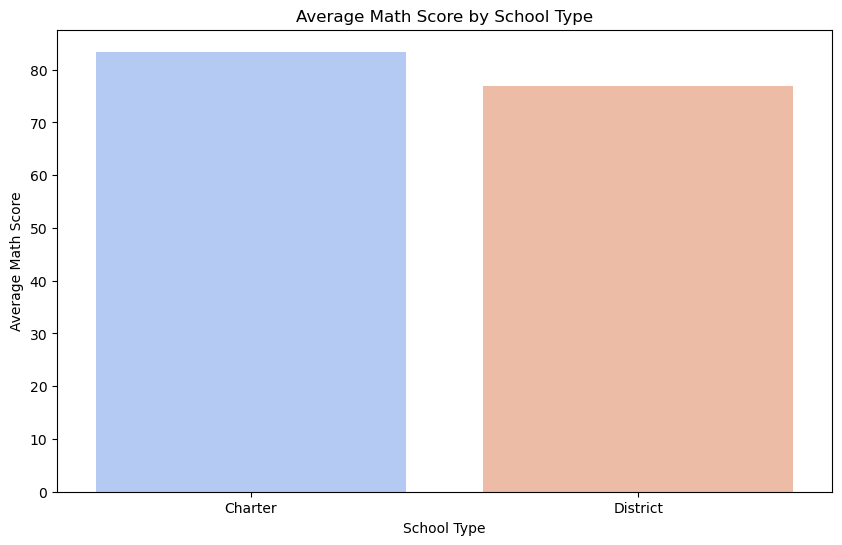

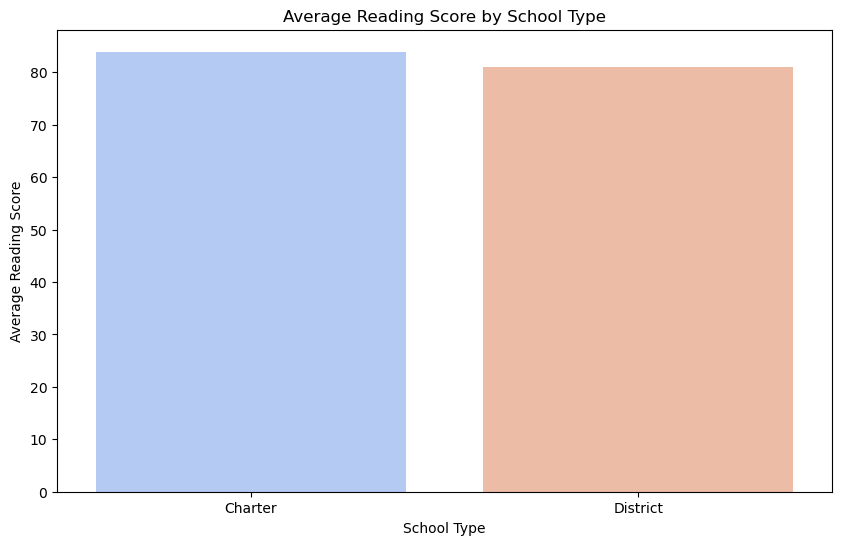

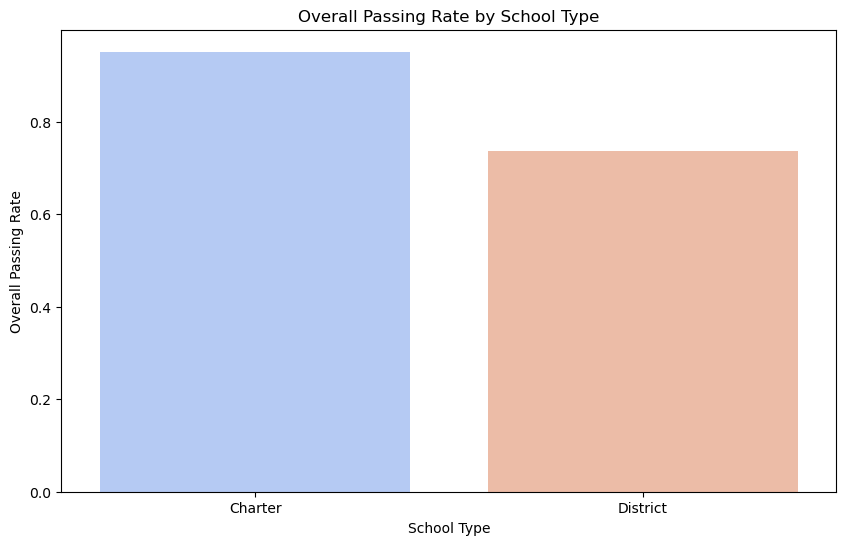

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the datasets into DataFrames
schools_data = pd.read_csv("Resources/schools_complete.csv")
students_data = pd.read_csv("Resources/students_complete.csv")

# Merge the datasets on the common column (school name or ID)
merged_data = pd.merge(students_data, schools_data, how="left", on="school_name")

# Calculate % passing math, % passing reading, and % overall passing for each school
merged_data['% Passing Math'] = merged_data['math_score'].apply(lambda x: 1 if x >= 70 else 0)
merged_data['% Passing Reading'] = merged_data['reading_score'].apply(lambda x: 1 if x >= 70 else 0)
merged_data['% Overall Passing'] = (merged_data['% Passing Math'] + merged_data['% Passing Reading']) / 2

# Group the data by school type and calculate the required statistics
school_type_summary = merged_data.groupby('type').agg({
    'math_score': 'mean',
    'reading_score': 'mean',
    '% Passing Math': 'mean',
    '% Passing Reading': 'mean',
    '% Overall Passing': 'mean'
}).reset_index()

# Create bar plots using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=school_type_summary, x='type', y='math_score', palette='coolwarm')
plt.title('Average Math Score by School Type')
plt.xlabel('School Type')
plt.ylabel('Average Math Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=school_type_summary, x='type', y='reading_score', palette='coolwarm')
plt.title('Average Reading Score by School Type')
plt.xlabel('School Type')
plt.ylabel('Average Reading Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=school_type_summary, x='type', y='% Overall Passing', palette='coolwarm')
plt.title('Overall Passing Rate by School Type')
plt.xlabel('School Type')
plt.ylabel('Overall Passing Rate')
plt.show()